<a href="https://colab.research.google.com/github/ktongk/BTT-JPMC-1/blob/Katrina/JPMorganPrice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import yfinance as yf
import os
import json

import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt


from datetime import datetime
''
# this workaround let's us override pandas_datareader with yfinance,
# although we can also use yfinance directly

import pandas_datareader.data as web; yf.pdr_override()

In [2]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol = data[0]
table_industry = data[0]['GICS Sector']

#these 2 lists are in order with one another
symbols = list(table_symbol.Symbol.values)
industries = list(table_industry.values) ##Industry Sector


remove = []

symbols_to_remove = ['BF.B', 'BRK.B', 'KVUE', 'VLTO','SPY']

for i, symbol in enumerate(symbols):
    if symbol in symbols_to_remove:
        remove.append(i)
#print(remove)

#list(set(industries))

for i in remove:
    symbols.remove(symbols[i])
    industries.remove(industries[i])

print(len(symbols))

symbol_industry = dict(zip(symbols,industries))
print(len(symbol_industry))

499
499


In [3]:
# old day 2023-02-02
# old end 2023-03-21
start_date = '2022-01-01'
end_date  = '2022-12-31'

data_dir = '/data/'

In [4]:
names = ['','SVB announces 1.8 billion loss on bonds', 'SVB shares fall 60%, depositors withdraw money',
         'FDIC takes over SVB only insures up to 250k', 'Fed, Tresury, & FDIC say theyll cover all deposits',
         'Bank stocks bounced back in early trading','',
        ]

dates = ['2023-03-07','2023-03-08', '2023-03-09', '2023-03-10',
             '2023-03-12', '2023-03-14','2023-03-15'
        ]

    # Convert date strings (e.g. 2014-10-18) to datetime
    #import in above cell
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates] #strptime takes in date and format

In [5]:
'''
try:
  os.mkdir(data_dir)
except:
  print("Dir Error")
  '''
os.makedirs(data_dir, exist_ok=True)

In [6]:
symbols = sorted(symbols)
print("Downloading {} files".format(len(symbols)))
for i, symbol in enumerate(symbols):
    try:
        df = web.get_data_yahoo(symbol, start_date, end_date,)
        # df = web.DataReader(symbol,'yahoo', start_date, end_date)
        df = df[['Adj Close','Volume']]
        df.to_csv(os.path.join(data_dir, "{}.csv".format(symbol)))
    except KeyError:
      print("Error for {}".format(symbol))
      pass
print("Stored {} files".format(i+1))




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2022-12-31)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1672462800")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1672462800")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [7]:
df.drop(columns='Volume')

,Adj Close
Date,
2022-01-03,230.225357
2022-01-04,221.460236
2022-01-05,213.039352
2022-01-06,213.885376
2022-01-07,207.658279
...,...
2022-12-23,144.442413
2022-12-27,143.986588
2022-12-28,142.529861


In [8]:
index = pd.date_range(start=start_date, end=end_date, freq='D')     # initialize an empty DateTime Index and so each index is a date over the month
df_price = pd.DataFrame(index=index, columns=symbols)               # initialize empty dataframes

# Aggregate all symbols into a price dataframe and volume dataframe
#for each ticker symbol get that csv file, set the index of that to the datetimes
#for each column in df_price is that company's adj price every datetime
for symbol in symbols:
    symbol_df = pd.read_csv(os.path.join(data_dir, symbol+".csv")).set_index('Date')
    symbol_df.index = pd.to_datetime(symbol_df.index)

    df_price[symbol] = symbol_df['Adj Close']

In [9]:
# Let's drop the dates where all the stocks are NaNs, ie., weekends/holidays where no trading occured
df_price.dropna(how='all', inplace=True)
df_price.dropna(inplace=True, axis=1)

In [10]:
df_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-03,154.596817,18.750000,179.953888,125.280708,172.679993,134.063416,44.549999,395.446655,564.369995,170.609253,...,87.086349,64.450035,59.097816,55.447811,113.907425,131.481277,123.620811,583.900024,59.537766,230.225357
2022-01-04,149.370483,19.020000,177.669998,125.040176,170.800003,130.910477,45.130001,392.620728,554.000000,169.068344,...,86.808533,64.857956,61.320728,55.730461,115.115791,132.184280,124.874908,587.599976,61.233810,221.460236
2022-01-05,146.811661,18.680000,172.943985,125.697006,162.250000,130.322311,44.599998,385.706390,514.429993,166.458420,...,83.593765,65.493530,62.083393,54.833786,113.546875,130.508636,124.463257,558.179993,61.372841,213.039352
2022-01-06,147.325409,18.570000,170.056992,125.104927,159.750000,130.302994,44.860001,367.080475,514.119995,166.988098,...,83.980736,64.981262,63.543648,54.794796,113.390968,131.856857,123.429337,555.159973,63.893742,213.885376
2022-01-07,143.403183,19.280001,170.225037,124.781128,166.050003,130.708008,45.070000,360.039917,510.700012,162.606094,...,83.891434,65.550438,64.064491,54.970230,112.484695,130.344910,122.682602,530.859985,64.959549,207.658279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,148.183105,12.710000,131.127045,156.766937,85.250000,106.058319,63.380001,261.928558,338.450012,160.778229,...,80.091263,68.689735,105.091942,31.343016,108.321205,126.519455,125.965240,248.220001,46.140099,144.442413
2022-12-27,148.500870,12.530000,129.307251,156.661194,83.489998,106.440666,63.619999,261.160736,335.089996,159.168854,...,83.673149,69.309525,106.552094,31.579346,109.298485,127.500969,126.551857,251.000000,46.511501,143.986588
2022-12-28,147.051102,12.320000,125.339417,155.930695,82.489998,105.715179,62.599998,259.004974,328.329987,157.284744,...,79.466164,68.810287,104.801849,30.506023,107.541344,126.921883,125.269241,246.839996,45.682980,142.529861
2022-12-29,150.030060,12.700000,128.889572,156.247894,85.230003,108.146530,63.110001,264.182709,337.579987,160.915604,...,80.627068,69.297813,105.594765,31.914906,110.206680,127.589317,127.098717,257.529999,46.740059,146.810806


In [11]:
df_pct = df_price.pct_change()[1:]
df_pct

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-04,-0.033806,0.014400,-0.012692,-0.001920,-0.010887,-0.023518,0.013019,-0.007146,-0.018374,-0.009032,...,-0.003190,0.006329,0.037614,0.005098,0.010608,0.005347,0.010145,0.006337,0.028487,-0.038072
2022-01-05,-0.017131,-0.017876,-0.026600,0.005253,-0.050059,-0.004493,-0.011744,-0.017611,-0.071426,-0.015437,...,-0.037033,0.009799,0.012437,-0.016089,-0.013629,-0.012677,-0.003297,-0.050068,0.002270,-0.038024
2022-01-06,0.003499,-0.005889,-0.016693,-0.004710,-0.015408,-0.000148,0.005830,-0.048290,-0.000603,0.003182,...,0.004629,-0.007822,0.023521,-0.000711,-0.001373,0.010331,-0.008307,-0.005410,0.041075,0.003971
2022-01-07,-0.026623,0.038234,0.000988,-0.002588,0.039437,0.003108,0.004681,-0.019180,-0.006652,-0.026241,...,-0.001063,0.008759,0.008197,0.003202,-0.007992,-0.011467,-0.006050,-0.043771,0.016681,-0.029114
2022-01-10,0.000069,-0.025415,0.000116,0.011195,-0.032159,-0.002213,0.021078,0.006069,0.029626,0.009240,...,-0.028149,0.010999,-0.005952,-0.016844,-0.010136,-0.013964,-0.009754,0.008571,-0.007562,0.007153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001476,0.011943,-0.002798,-0.001041,0.004477,0.001389,0.008433,0.005024,0.005735,0.000550,...,-0.006401,0.012852,0.026445,0.011118,-0.000728,0.000621,0.001106,0.002869,0.003521,0.005033
2022-12-27,0.002144,-0.014162,-0.013878,-0.000675,-0.020645,0.003605,0.003787,-0.002931,-0.009928,-0.010010,...,0.044723,0.009023,0.013894,0.007540,0.009022,0.007758,0.004657,0.011200,0.008049,-0.003156
2022-12-28,-0.009763,-0.016760,-0.030685,-0.004663,-0.011977,-0.006816,-0.016033,-0.008255,-0.020174,-0.011837,...,-0.050279,-0.007203,-0.016426,-0.033988,-0.016077,-0.004542,-0.010135,-0.016574,-0.017813,-0.010117
2022-12-29,0.020258,0.030844,0.028324,0.002034,0.033216,0.022999,0.008147,0.019991,0.028173,0.023085,...,0.014609,0.007085,0.007566,0.046184,0.024784,0.005259,0.014604,0.043307,0.023139,0.030035


In [12]:
df_pct = df_pct.dropna(how='all')

In [13]:
df_pct

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-04,-0.033806,0.014400,-0.012692,-0.001920,-0.010887,-0.023518,0.013019,-0.007146,-0.018374,-0.009032,...,-0.003190,0.006329,0.037614,0.005098,0.010608,0.005347,0.010145,0.006337,0.028487,-0.038072
2022-01-05,-0.017131,-0.017876,-0.026600,0.005253,-0.050059,-0.004493,-0.011744,-0.017611,-0.071426,-0.015437,...,-0.037033,0.009799,0.012437,-0.016089,-0.013629,-0.012677,-0.003297,-0.050068,0.002270,-0.038024
2022-01-06,0.003499,-0.005889,-0.016693,-0.004710,-0.015408,-0.000148,0.005830,-0.048290,-0.000603,0.003182,...,0.004629,-0.007822,0.023521,-0.000711,-0.001373,0.010331,-0.008307,-0.005410,0.041075,0.003971
2022-01-07,-0.026623,0.038234,0.000988,-0.002588,0.039437,0.003108,0.004681,-0.019180,-0.006652,-0.026241,...,-0.001063,0.008759,0.008197,0.003202,-0.007992,-0.011467,-0.006050,-0.043771,0.016681,-0.029114
2022-01-10,0.000069,-0.025415,0.000116,0.011195,-0.032159,-0.002213,0.021078,0.006069,0.029626,0.009240,...,-0.028149,0.010999,-0.005952,-0.016844,-0.010136,-0.013964,-0.009754,0.008571,-0.007562,0.007153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001476,0.011943,-0.002798,-0.001041,0.004477,0.001389,0.008433,0.005024,0.005735,0.000550,...,-0.006401,0.012852,0.026445,0.011118,-0.000728,0.000621,0.001106,0.002869,0.003521,0.005033
2022-12-27,0.002144,-0.014162,-0.013878,-0.000675,-0.020645,0.003605,0.003787,-0.002931,-0.009928,-0.010010,...,0.044723,0.009023,0.013894,0.007540,0.009022,0.007758,0.004657,0.011200,0.008049,-0.003156
2022-12-28,-0.009763,-0.016760,-0.030685,-0.004663,-0.011977,-0.006816,-0.016033,-0.008255,-0.020174,-0.011837,...,-0.050279,-0.007203,-0.016426,-0.033988,-0.016077,-0.004542,-0.010135,-0.016574,-0.017813,-0.010117
2022-12-29,0.020258,0.030844,0.028324,0.002034,0.033216,0.022999,0.008147,0.019991,0.028173,0.023085,...,0.014609,0.007085,0.007566,0.046184,0.024784,0.005259,0.014604,0.043307,0.023139,0.030035


In [14]:
# Convert index to datetime if it's in string format
df_pct.index = pd.to_datetime(df_pct.index)

# Create a new DataFrame with the desired structure
new_df = pd.DataFrame(index=[f'{company} Week {week}' for company in df_pct for week in range(1, 53)],
                      columns=['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])

# Iterate through rows of the original DataFrame and fill the new DataFrame
for i, row in df_pct.iterrows():
    week = i.week
    day = i.dayofweek

    for column_name in df_pct.columns:
      new_df.at[f'{column_name} Week {week}', f'Day {day + 1}'] = row[column_name]

# Display the new DataFrame
pct = new_df
pct


,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,NaN,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003376
A Week 3,NaN,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
...,...,...,...,...,...
ZTS Week 48,-0.013125,-0.00189,0.042543,0.016219,0.00498
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020226,-0.028579
ZTS Week 51,-0.008791,-0.005028,0.017197,0.000759,0.005033


In [15]:
pct = pct.dropna(how='any')

In [16]:
pct

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003376
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
A Week 6,-0.005315,0.003135,0.025779,-0.019247,-0.031484
A Week 7,-0.014504,0.005177,-0.005592,-0.036256,0.01382
...,...,...,...,...,...
ZTS Week 46,-0.014137,0.023011,-0.010279,-0.031562,0.014206
ZTS Week 48,-0.013125,-0.00189,0.042543,0.016219,0.00498
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020226,-0.028579


# Begin prediction

## XGBoost using all of the data

### Modeling

In [17]:
pct

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003376
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
A Week 6,-0.005315,0.003135,0.025779,-0.019247,-0.031484
A Week 7,-0.014504,0.005177,-0.005592,-0.036256,0.01382
...,...,...,...,...,...
ZTS Week 46,-0.014137,0.023011,-0.010279,-0.031562,0.014206
ZTS Week 48,-0.013125,-0.00189,0.042543,0.016219,0.00498
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020226,-0.028579


In [18]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
pct_drop = pct

y = pct_drop["Day 5"].astype(float)
X = pct_drop.drop("Day 5", axis=1).astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Initialize
model = XGBRegressor(objective='reg:squarederror', random_state=1234)
# Train
model.fit(X_train, y_train)
# Create Predictions
y_pred = model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

pred_df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})
pred_df

Mean Squared Error: 0.0005748671637372967


,Actual Prices,Predicted Prices
HON Week 30,0.010607,-0.002397
EBAY Week 44,0.032200,0.008068
COST Week 9,-0.014164,0.005017
HPQ Week 19,0.026228,-0.003846
PPG Week 9,-0.032019,0.008860
...,...,...
WMB Week 35,0.004169,-0.002149
PEG Week 14,0.006703,-0.001257
WYNN Week 20,0.004299,-0.007735
EIX Week 50,-0.024427,-0.000347


### Graph

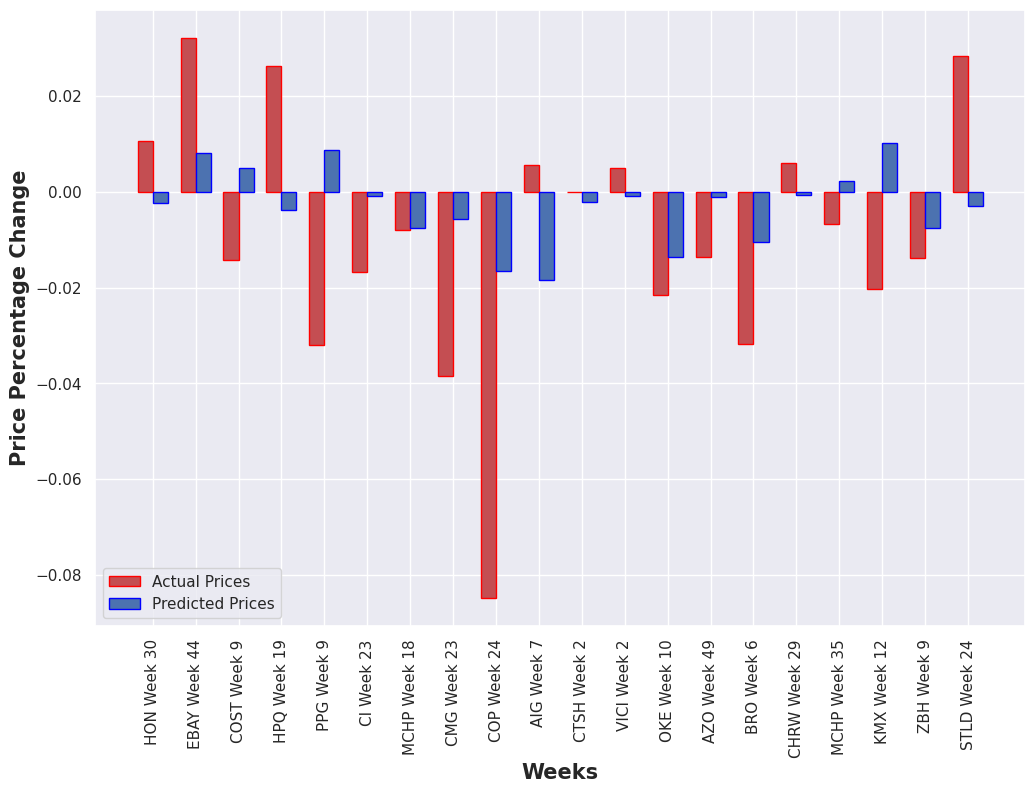

In [32]:
# Use the first 20
pred_df_20 = pred_df.head(20)

# Set width of bar
barWidth = 0.35
fig, ax = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(pred_df_20))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, pred_df_20['Actual Prices'], color='r', width=barWidth, edgecolor='red', label='Actual Prices')
plt.bar(br2, pred_df_20['Predicted Prices'], color='b', width=barWidth, edgecolor='blue', label='Predicted Prices')

# Adding Xticks
plt.xlabel('Weeks', fontweight='bold', fontsize=15)
plt.ylabel('Price Percentage Change', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth/2 for r in range(len(pred_df_20))], pred_df_20.index, rotation='vertical')

plt.legend()
plt.show()



### Hyper param Tuning

In [ ]:
'''
Build 2 XGBoost Models
'''

In [73]:
xgb_2_model = XGBRegressor(n_estimators=100, max_depth=2)

# Fit the model
xgb_2_model.fit(X_train, y_train)

# Make predictions
predict1 = xgb_2_model.predict(X_test)

# Evaluate using MSE
mse_2 = mean_squared_error(y_test, predict1)
print("Mean Squared Error for 2 max depth (XGBoost):", mse_2)

pred_df_2 = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': predict1})
pred_df_2

xgb_10_model = XGBRegressor(n_estimators=100, max_depth=10)

# Fit the model
xgb_10_model.fit(X_train, y_train)

# Make the Predictions
predict2 = xgb_10_model.predict(X_test)

# Evaluate using MSE
mse_10 = mean_squared_error(y_test, predict2)
print("Mean Squared Error for 10 max depth (XGBoost):", mse_10)

pred_df_10 = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': predict2})
pred_df_10

Mean Squared Error for 2 max depth (XGBoost): 0.0005366903348831745
Mean Squared Error for 10 max depth (XGBoost): 0.0006149650616125135


,Actual Prices,Predicted Prices
HON Week 30,0.010607,-0.007855
EBAY Week 44,0.032200,0.001991
COST Week 9,-0.014164,0.016421
HPQ Week 19,0.026228,-0.006056
PPG Week 9,-0.032019,0.008986
...,...,...
WMB Week 35,0.004169,-0.017079
PEG Week 14,0.006703,0.001210
WYNN Week 20,0.004299,-0.003014
EIX Week 50,-0.024427,0.010876


#### Graphs

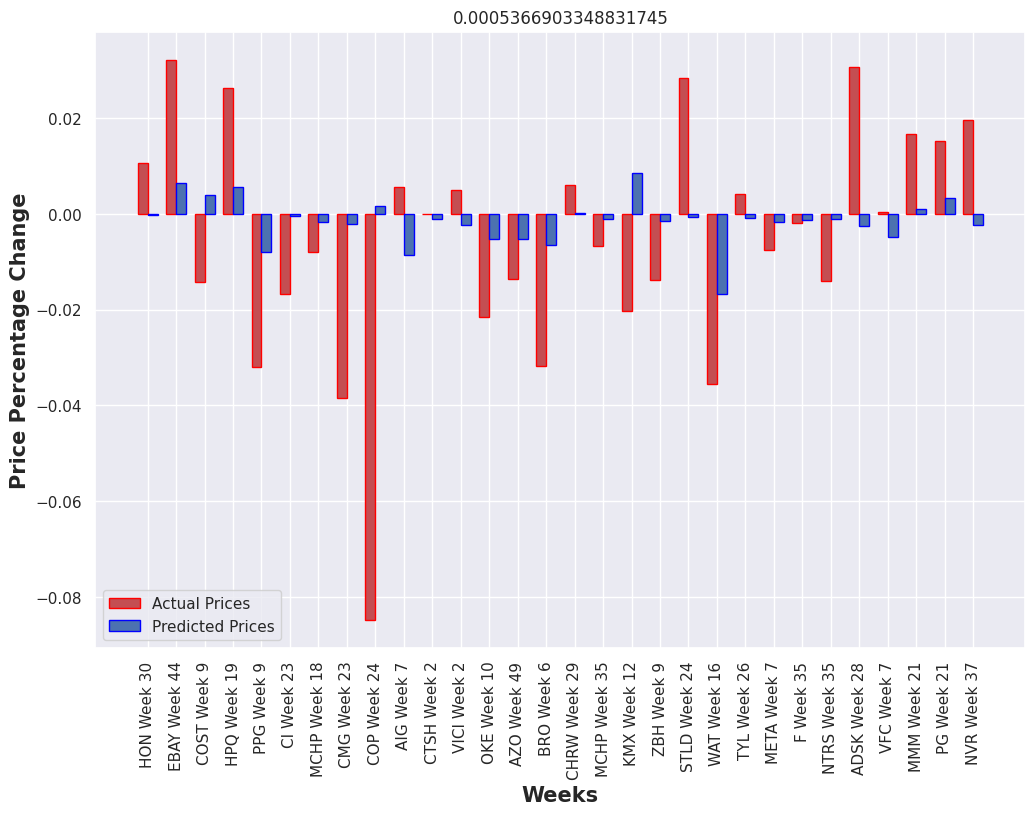

In [37]:
# Use the first 30
pred_df_2_30 = pred_df_2.head(30)

# Set width of bar
barWidth = 0.35
fig, ax = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(pred_df_2_30))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, pred_df_2_30['Actual Prices'], color='r', width=barWidth, edgecolor='red', label='Actual Prices')
plt.bar(br2, pred_df_2_30['Predicted Prices'], color='b', width=barWidth, edgecolor='blue', label='Predicted Prices')

# Adding Xticks
plt.xlabel('Weeks', fontweight='bold', fontsize=15)
plt.ylabel('Price Percentage Change', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth/2 for r in range(len(pred_df_2_30))], pred_df_2_30.index, rotation='vertical')

plt.legend()
plt.title(mse_2)
plt.show()



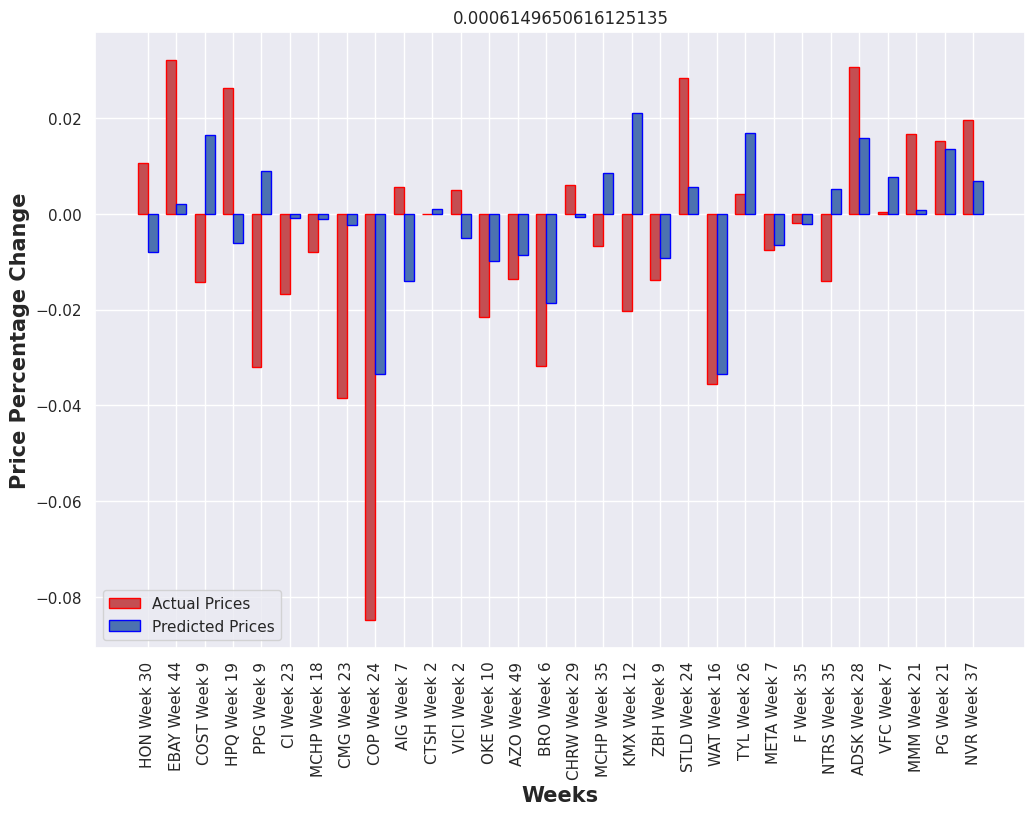

In [38]:
# Use the first 30
pred_df_10_30 = pred_df_10.head(30)

# Set width of bar
barWidth = 0.35
fig, ax = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(pred_df_10_30))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, pred_df_10_30['Actual Prices'], color='r', width=barWidth, edgecolor='red', label='Actual Prices')
plt.bar(br2, pred_df_10_30['Predicted Prices'], color='b', width=barWidth, edgecolor='blue', label='Predicted Prices')

# Adding Xticks
plt.xlabel('Weeks', fontweight='bold', fontsize=15)
plt.ylabel('Price Percentage Change', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth/2 for r in range(len(pred_df_10_30))], pred_df_10_30.index, rotation='vertical')

plt.legend()
plt.title(mse_10)
plt.show()


### Grid Search Using XGBoost

In [56]:
from sklearn.model_selection import GridSearchCV

# Create model
grid_model = XGBRegressor()

# Define the hyperparamter grid to search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 2, 10, 20, 30]
}

# Creat GridSearchCV object
grid_search = GridSearchCV(estimator=grid_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Make the predictions
grid_pred = grid_search.best_estimator_.predict(X_test)

pred_df_grid = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': grid_pred})
pred_df_grid

# Evaluate
grid_mse = mean_squared_error(y_test, grid_pred)
print("Mean Squared Error:", grid_mse)

Best Hyperparameters: {'max_depth': 2, 'n_estimators': 100}
Mean Squared Error: 0.0005366903348831745


## XGBoost Using Sectors

### Creating the DataFrames

In [ ]:
'''
symbol_industry is a dictionary of symbols and their correspdoning industry
Format: company : industry

companies dictionary contains dataframes named after the industries
'''

In [20]:
pct

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003376
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
A Week 6,-0.005315,0.003135,0.025779,-0.019247,-0.031484
A Week 7,-0.014504,0.005177,-0.005592,-0.036256,0.01382
...,...,...,...,...,...
ZTS Week 46,-0.014137,0.023011,-0.010279,-0.031562,0.014206
ZTS Week 48,-0.013125,-0.00189,0.042543,0.016219,0.00498
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020226,-0.028579


In [39]:
first_word = pct.index.str.split().str[0]
first_word

Index(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       ...
       'ZTS', 'ZTS', 'ZTS', 'ZTS', 'ZTS', 'ZTS', 'ZTS', 'ZTS', 'ZTS', 'ZTS'],
      dtype='object', length=20748)

In [49]:
unique_industry = list(set(industries))
unique_industry

# Create companies dictionary
companies = {}

# Create a dictionary of the industries
for industry in unique_industry:
  df = pd.DataFrame()

  # Place empty df in the companies dictionary with the name as unique_industry
  companies[industry] = df


In [50]:
# Iterate through the dictionary to find the company
for company, industry in symbol_industry.items():

  # Use vectorization, any index containing company will be placed in the corresponding dictionary
  index_to_append = pct.index[pct.index.str.split().str[0] == company]

  # Append the indicies to their corresponding dictionary
  companies[industry] = pd.concat([companies[industry], pct.loc[index_to_append]])

In [51]:
companies['Communication Services']

,Day 1,Day 2,Day 3,Day 4,Day 5
ALLE Week 2,-0.012161,0.020145,-0.000235,-0.011444,-0.013162
ALLE Week 4,0.018717,-0.02323,-0.002403,0.000997,0.005809
ALLE Week 5,0.01254,-0.022244,0.0015,-0.033866,0.027043
ALLE Week 6,0.010147,0.01046,0.028426,-0.035868,-0.01508
ALLE Week 7,-0.004543,-0.010479,-0.0158,-0.00564,-0.004014
...,...,...,...,...,...
WBD Week 46,-0.029561,-0.013925,-0.03707,0.004583,-0.017336
WBD Week 48,-0.047951,0.020147,0.023339,0.020175,-0.006879
WBD Week 49,-0.034632,-0.04843,0.012253,0.001862,0.030669
WBD Week 50,0.016231,-0.033718,0.008264,-0.089253,-0.009


### Predicting with Sectors

In [53]:
'''
I want to create a method that will train my data and then input it into their separate dataframes
'''

'\nI want to create a method that will train my data and then input it into their separate dataframes\n'

In [57]:
# Create prediction dictionary
pred_sector = {}

# Create a dictionary of the industries
for industry in unique_industry:
  df = pd.DataFrame()

  # Place empty df in the companies dictionary with the name as unique_industry
  pred_sector[industry] = df


In [60]:
# Create a dictionary for the mse values
mse_sector = {name: [] for name in unique_industry}

In [66]:
# Create a Function that will train my models
def xgb_training(df, name, pred_sector, mse_sector):

  # df is the dataframe inputted
  # name is the industry inputted

  # Create our training and testing data
  y_sector = df["Day 5"].astype(float)
  X_sector = df.drop("Day 5", axis=1).astype(float)

  X_sector_train, X_sector_test, y_sector_train, y_sector_test = train_test_split(X_sector, y_sector, test_size=0.2, random_state=1234)

  # Create model
  sector_model = XGBRegressor()

  # Define the hyperparamter grid to search
  param_grid = {
      'n_estimators': [50, 100, 200, 300],
      'max_depth': [None, 2, 10, 20, 30]
      }

  # Creat GridSearchCV object
  grid_search_sector = GridSearchCV(estimator=sector_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

  # Fit the model
  grid_search_sector.fit(X_sector_train, y_sector_train)

  print(f"Best Hyperparameters: {name}", grid_search_sector.best_params_)

  # Make the predictions
  sector_pred = grid_search_sector.best_estimator_.predict(X_sector_test)

  # Create a dataframe containing the proper prediction
  pred_sector_df = pd.DataFrame({'Actual Prices': y_sector_test, 'Predicted Prices': sector_pred})

  # Place the prediction into the dictionary
  pred_sector[name] = pred_sector_df

  # Evaluate
  sector_mse = mean_squared_error(y_sector_test, sector_pred)

  # Place the mse into the dictionary
  mse_sector[name]  = sector_mse
  print(f"Mean Squared Error: {name}", sector_mse)

  return pred_sector, mse_sector

In [67]:
# Begin Using the function
for industry in unique_industry:

  # Training using the function
  xgb_training(companies[industry], industry, pred_sector, mse_sector)

Best Hyperparameters: Financials {'max_depth': 2, 'n_estimators': 50}
Mean Squared Error: Financials 0.000601998998398872
Best Hyperparameters: Materials {'max_depth': 2, 'n_estimators': 50}
Mean Squared Error: Materials 0.0005225728592290475
Best Hyperparameters: Consumer Staples {'max_depth': 2, 'n_estimators': 50}
Mean Squared Error: Consumer Staples 0.0005662846121429346
Best Hyperparameters: Consumer Discretionary {'max_depth': 2, 'n_estimators': 50}
Mean Squared Error: Consumer Discretionary 0.0005159109225272011
Best Hyperparameters: Health Care {'max_depth': 2, 'n_estimators': 50}
Mean Squared Error: Health Care 0.0005123415481920515
Best Hyperparameters: Communication Services {'max_depth': 2, 'n_estimators': 50}
Mean Squared Error: Communication Services 0.0005696358463301506
Best Hyperparameters: Industrials {'max_depth': 2, 'n_estimators': 50}
Mean Squared Error: Industrials 0.0006702111863475567
Best Hyperparameters: Energy {'max_depth': 2, 'n_estimators': 50}
Mean Squared

In [68]:
pred_sector['Communication Services']

,Actual Prices,Predicted Prices
FTV Week 6,-0.007604,-0.001574
IFF Week 49,-0.004085,0.000381
NEM Week 33,-0.025084,0.012271
NWSA Week 20,0.006286,0.003057
ALLE Week 29,-0.000677,0.011834
...,...,...
MRK Week 17,0.001242,0.000260
CRL Week 20,0.003754,0.007167
CRL Week 51,0.000641,-0.003656
NTAP Week 11,0.037958,-0.003565


### Graph

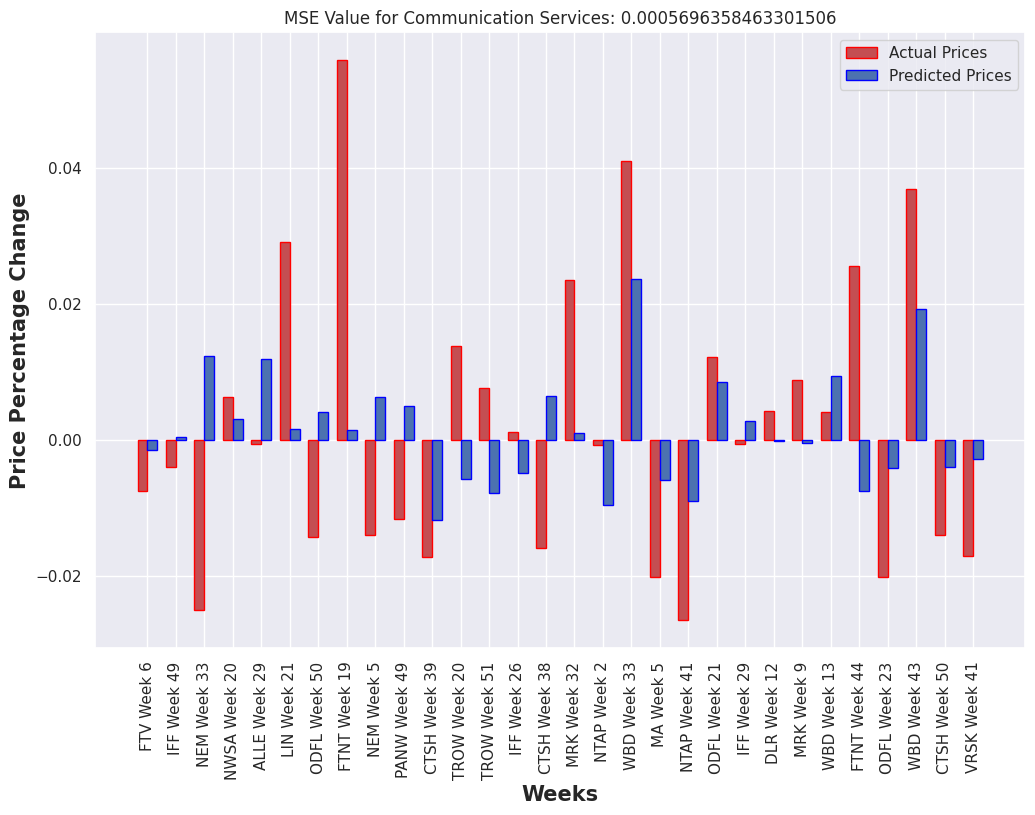

In [71]:
# Use the first 30
comm_pred = pred_sector['Communication Services'].head(30)

# Set width of bar
barWidth = 0.35
fig, ax = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(comm_pred))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, comm_pred['Actual Prices'], color='r', width=barWidth, edgecolor='red', label='Actual Prices')
plt.bar(br2, comm_pred['Predicted Prices'], color='b', width=barWidth, edgecolor='blue', label='Predicted Prices')

# Adding Xticks
plt.xlabel('Weeks', fontweight='bold', fontsize=15)
plt.ylabel('Price Percentage Change', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth/2 for r in range(len(comm_pred))], comm_pred.index, rotation='vertical')

plt.legend()
plt.title(f"MSE Value for Communication Services: {mse_sector['Communication Services']}")
plt.show()


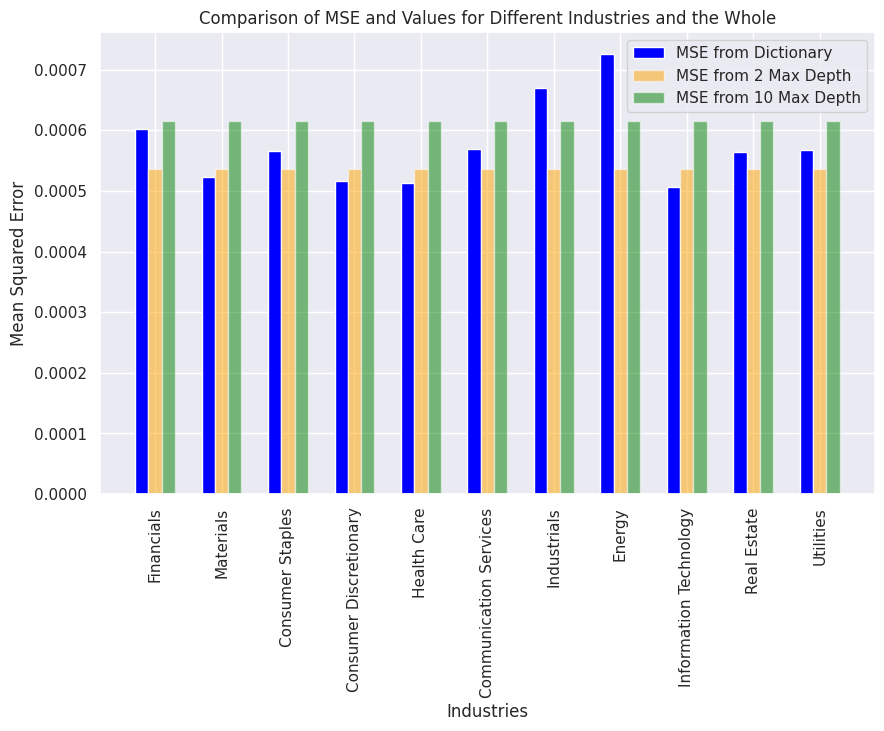

In [90]:

# Extract industry names and MSE values from the dictionary
industries_names = list(mse_sector.keys())
mse_values = list(mse_sector.values())

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate x-coordinates for each set of bars
x_values_dict = np.arange(len(industries_names))
x_values_2 = x_values_dict + bar_width
x_values_10 = x_values_dict + 2 * bar_width

# Plot MSE values from the dictionary
ax.bar(x_values_dict, mse_values, width=bar_width, label='MSE from Dictionary', color='blue')

# Plot values from the first DataFrame
ax.bar(x_values_2, mse_2, width=bar_width, label='MSE from 2 Max Depth', color='orange', alpha=0.5)

# Plot values from the second DataFrame
ax.bar(x_values_10, mse_10, width=bar_width, label='MSE from 10 Max Depth', color='green', alpha=0.5)

# Customize the plot
ax.set_xlabel('Industries')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Comparison of MSE and Values for Different Industries and the Whole')
plt.xticks(x_values_2, industries_names, rotation='vertical')
ax.legend()

# Show the plot
plt.show()


In [96]:
sorted_mse = dict(sorted(mse_sector.items(), key=lambda x: x[1]))
sorted_mse

{'Information Technology': 0.0005061003537822003,
 'Health Care': 0.0005123415481920515,
 'Consumer Discretionary': 0.0005159109225272011,
 'Materials': 0.0005225728592290475,
 'Real Estate': 0.0005641457394652293,
 'Consumer Staples': 0.0005662846121429346,
 'Utilities': 0.0005672933197916416,
 'Communication Services': 0.0005696358463301506,
 'Financials': 0.000601998998398872,
 'Industrials': 0.0006702111863475567,
 'Energy': 0.0007255197100466234}

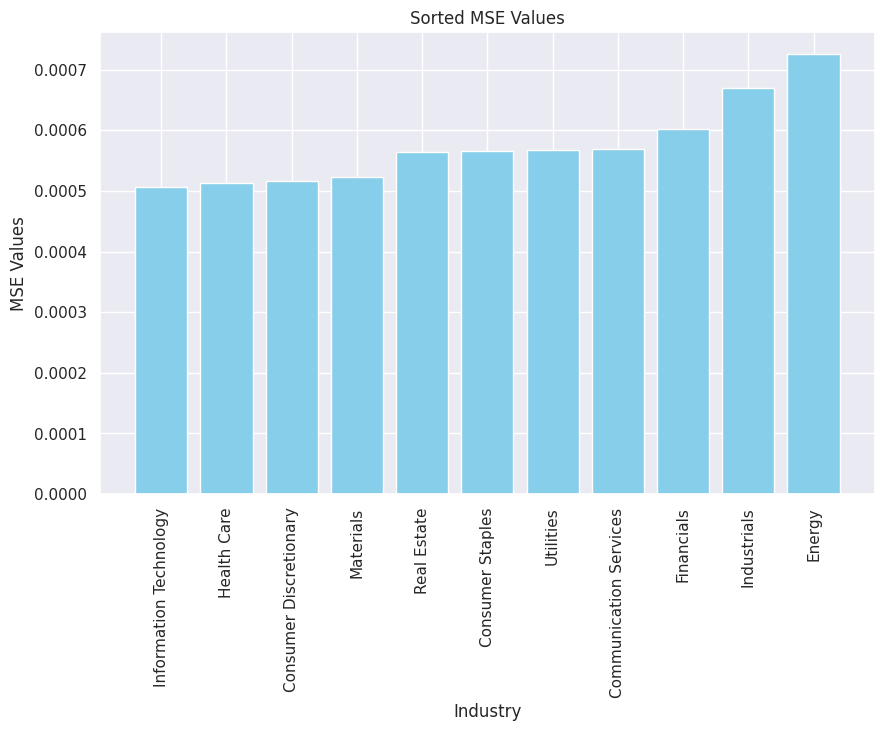

In [99]:
# Create a bar graph
# Extract x-axis names
industry_name_sorted, mse_values_sorted = zip(*sorted_mse.items())
plt.figure(figsize=(10, 6))
plt.bar(industry_name_sorted, mse_values_sorted, color='skyblue')
plt.xlabel('Industry', ha='center')
plt.ylabel('MSE Values')
plt.title('Sorted MSE Values')
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
'''
Comments: Energy seems to be the worst predicted with the highest MSE values.
Why could this be? It could mean Energy had the greatest amount of fluctuations this year.
This could make sense bc energy tends to fluctuate with gas prices and other American policies.
Information technology seems to have the best prediction.

### Random Look at this later

In [21]:
# Create dictionary
companies = {}

for i in range(0, len(pct), n):
    # Extract 52 rows for the current iteration
    df_iteration = pct.iloc[i:i + n]

    # Get the corresponding symbol for the dataframe
    symbol = symbols[i // n]  # Integer division to get the index of the symbol

    # Add the dataframe to the dictionary with the symbol as the key
    companies[symbol] = df_iteration



In [22]:
len(symbols)

499

In [25]:
companies['A']

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003376
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
A Week 6,-0.005315,0.003135,0.025779,-0.019247,-0.031484
A Week 7,-0.014504,0.005177,-0.005592,-0.036256,0.01382
A Week 9,-0.0252,0.012044,0.009323,0.030114,-0.023912
A Week 10,-0.026514,-0.007826,0.030467,0.008029,-0.029926
A Week 11,-0.02095,0.021163,0.03623,0.013482,0.01681
A Week 12,-0.007044,0.008325,-0.036686,0.01662,-0.005132
A Week 13,-0.002137,0.022153,-0.021384,-0.023106,0.012393


#### MSE

In [26]:
# Dictionary that will hold mse values
mse_dict = {name: None for name in symbols}
mse_dict

{'A': None,
 'AAL': None,
 'AAPL': None,
 'ABBV': None,
 'ABNB': None,
 'ABT': None,
 'ACGL': None,
 'ACN': None,
 'ADBE': None,
 'ADI': None,
 'ADM': None,
 'ADP': None,
 'ADSK': None,
 'AEE': None,
 'AEP': None,
 'AES': None,
 'AFL': None,
 'AIG': None,
 'AIZ': None,
 'AJG': None,
 'AKAM': None,
 'ALB': None,
 'ALGN': None,
 'ALK': None,
 'ALL': None,
 'ALLE': None,
 'AMAT': None,
 'AMCR': None,
 'AMD': None,
 'AME': None,
 'AMGN': None,
 'AMP': None,
 'AMT': None,
 'AMZN': None,
 'ANET': None,
 'ANSS': None,
 'AON': None,
 'AOS': None,
 'APA': None,
 'APD': None,
 'APH': None,
 'APTV': None,
 'ARE': None,
 'ATO': None,
 'AVB': None,
 'AVGO': None,
 'AVY': None,
 'AWK': None,
 'AXON': None,
 'AXP': None,
 'AZO': None,
 'BA': None,
 'BAC': None,
 'BALL': None,
 'BAX': None,
 'BBWI': None,
 'BBY': None,
 'BDX': None,
 'BEN': None,
 'BF.B': None,
 'BIIB': None,
 'BIO': None,
 'BK': None,
 'BKNG': None,
 'BKR': None,
 'BLK': None,
 'BMY': None,
 'BR': None,
 'BRO': None,
 'BSX': None,
 '

## XGBoost

In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Create a dictionary to store predicted vs actual values
predictions_dict = {}

# Hyperparameters for the XGBoost model (you can adjust as needed)
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1
}

# Iterate through the dictionary of dataframes
for symbol, df in companies.items():

    X_new = df.drop('Day 5', axis=1).astype(float)
    y_new = df['Day 5'].astype(float)
    X_train_new, X_test_new, y_train_new, y_test_new  = train_test_split(X_new, y_new, test_size=0.2, random_state=1234)

    # Initialize the XGBoost model
    model = XGBRegressor(**params)

    # Train the model
    model.fit(X_train_new, y_train_new)
    # Create Predictions

    # Make predictions on the same training set for simplicity (you might want to use a test set)
    predictions = model.predict(X_test_new)

    # Calculate the MSE values
    mse_new = mean_squared_error(y_test_new, predictions)
    mse_dict[symbol] = mse_new

    #print(f'Mean Squared Error: {mse_new}')


    # Create a dataframe to store predicted vs actual values
    pred_df_new = pd.DataFrame({'Actual': y_test_new, 'Predicted': predictions})

    # Add the dataframe to the predictions dictionary with the symbol as the key
    predictions_dict[symbol] = pred_df_new

KeyboardInterrupt: ignored

In [ ]:
predictions_dict['ABBV']

In [ ]:
companies['ABNB']

In [ ]:
organized_dict = {}

for symbol, df in predictions_dict.items():
    # Set the symbol as the index of the DataFrame
    df.set_index('Weeks', inplace=True)

    # Add the DataFrame to the organized_dict
    organized_dict[symbol] = df

In [ ]:
fig = plt.figure()
ax = fig.add_axes

In [ ]:
# Extract keys (company names) and values (MSE values) from the dictionary
companies = list(mse_dict.keys())

# Cast values to float, handling None values
mse_dict = {key: float(value) if value is not None else None for key, value in mse_dict.items()}
mse_values_list = list(filter(None, mse_dict.values()))

# Plotting the MSE values
plt.figure(figsize=(10, 6))
plt.bar(companies[:len(mse_values_list)], mse_values_list, color='blue')  # Trim companies to match filtered values
plt.xlabel('Company')
plt.ylabel('MSE Value')
plt.title('MSE Values for Companies')
plt.show()


In [ ]:
A_plot = mse_dict.get('A')
plt.figure(figsize=(10, 6))
plt.bar('A', A_plot, color='blue')  # Trim companies to match filtered values
plt.xlabel('Company')
plt.ylabel('MSE Value')
plt.title('MSE Value for A')
plt.show()

In [ ]:
# Extract the first 20 companies and their MSE values
companies_to_plot = list(mse_dict.keys())[:20]
mse_values_to_plot = [mse_dict[company] for company in companies_to_plot]

# Plotting the MSE values for the first 20 companies
plt.figure(figsize=(10, 6))
plt.bar(companies_to_plot, mse_values_to_plot, color='blue')
plt.xlabel('Company')
plt.ylabel('MSE Value')
plt.title('MSE Values for the First 20 Companies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
predictions_dict['AAL']

In [ ]:
from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_28['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_27['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
predictions_dict['ANET']

### Training Based on Clustering

In [ ]:
pct

In [ ]:
df_price

In [ ]:
df_pct

In [ ]:
df_industry = pd.DataFrame({"Sectors": industries, "Company": symbols})


In [ ]:
df_industry

In [ ]:
df_pct = df_price.pct_change()[1:]
df_pct

In [ ]:
sectors_to_append = {sector: pd.DataFrame() for sector in df_industry['Sectors'].unique()}

# Iterate through rows to figure out if the sectors match the name
for _, company in df_industry.iterrows():
    company_name = company['Company']
    company_sector = company['Sectors']

    # Check if the company exists in the df_price DataFrame
    if company_name in df_pct.columns and company_sector in sectors_to_append:
        sectors_to_append[company_sector][company_name] = df_pct[company_name]

In [ ]:
sectors_to_append['Communication Services']

In [ ]:

# Iterate through the dictionary of DataFrames
for symbol, df in sectors_to_append.items():
    # Convert index to datetime if it's in string format
    df.index = pd.to_datetime(df.index)

    # Create a new DataFrame with the desired structure
    new_df = pd.DataFrame(index=[f'{column_name} Week {week}' for week in range(1, 53) for column_name in df.columns],
                          columns=['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])

    # Iterate through rows of the original DataFrame and fill the new DataFrame
    for i, row in df.iterrows():
        week = i.isocalendar()[1]  # Use isocalendar to get the ISO week number
        day = i.dayofweek

        for column_name in df.columns:
            new_df.at[f'{column_name} Week {week}', f'Day {day + 1}'] = row[column_name]

    # Replace the original DataFrame in the dictionary with the new DataFrame
    sectors_to_append[symbol] = new_df


In [ ]:
sectors_to_append['Communication Services']

In [ ]:
for symbols, df in sectors_to_append.items():
  new_df = df.drop(columns='Day 1')
  sectors_to_append[symbols] = new_df

In [ ]:
sectors_to_append['Consumer Discretionary']

In [ ]:
sectors_to_append['Utilities']

In [ ]:

sectors_to_append['Communication Services']

In [ ]:
sectors_to_append['Health Care']

In [ ]:
y_sector = sectors_to_append['Communication Services']['Day 5']
X_sectors = sectors_to_append['Communication Services'].drop(columns='Day 5')

X_train_sector, X_test_sector, y_train_sector, y_test_sector = train_test_split(X_sector, y_sector, test_size=0.2, random_state=1234)
model_reg = XGBRegressor(objective='reg:squarederror', random_state=1234)
model_reg.fit(X_train_sector, y_train_sector)

In [ ]:
predictions_sectors = {}
# Iterate through the dictionary of dataframes
for company, df in sectors_to_append.items():

    y_sector = df['Day 5'].astype(float)

    print(y_sector.shape)
    X_sector = df.drop('Day 5', axis=1).astype(float)
    print(X_sector.shape)


    X_train_sector, X_test_sector, y_train_sector, y_test_sector = train_test_split(X_sector, y_sector, test_size=0.2, random_state=1234)

    # Initialize the XGBoost model
    model_reg = XGBRegressor(objective='reg:squarederror', random_state=1234)

    # Train the model
    model_reg.fit(X_train_sector, y_train_sector)

    # Make predictions on the same training set for simplicity (you might want to use a test set)
    y_pred_sector = model.predict(X_test_sector)

    # Calculate the mean squared error
    mse_sector = mean_squared_error(y_test_sector, y_pred_sector)

    # Create a dataframe to store predicted vs actual values
    pred_df_new = pd.DataFrame({'Actual': y_test_sector, 'Predicted': y_pred_sector})

    # Add the dataframe to the predictions dictionary with the symbol as the key
    predictions_sectors[company] = pred_df_new

    # Print or store the mean squared error for each company
    print(f'Mean Squared Error for {company}: {mse_sector}')
